# Part 1

**Explore temporal patterns in SF crime data, with a focus on 10 key crime categories.**

In this part, we first calculate overall crime trends—identifying the years with the highest and lowest crime counts and plotting the total crimes per year. Then, we drill down into the evolution of the so-called focus crimes (i.e., WEAPON LAWS, PROSTITUTION, ROBBERY, BURGLARY, ASSAULT, DRUG/NARCOTIC, LARCENY/THEFT, VANDALISM, VEHICLE THEFT, STOLEN PROPERTY) by creating individual bar charts for each crime type, showing how their occurrence changes year by year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data 
df = pd.read_csv('my_data.csv')
df['PdDistrict'].unique()

C:\Users\Leuro\AppData\Local\Temp\ipykernel_29828\3111126061.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('my_data.csv')


array(['INGLESIDE', 'PARK', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN',
       'BAYVIEW', 'CENTRAL', 'NORTHERN', 'MISSION', 'RICHMOND', nan,
       '6.0', '2.0', '4.0', '1.0', '3.0', '8.0', '7.0', '5.0', '9.0',
       '10.0', 5.0, 6.0, 2.0, 1.0, 3.0, 10.0, 4.0, 7.0, 8.0, 9.0],
      dtype=object)

In [3]:
# Import data with specified dtype to avoid DtypeWarning and low_memory=False to avoid warning
# about mixed types in columns 
df = pd.read_csv('my_data.csv', dtype={'PdDistrict': str}, low_memory=False)
df['Crime_Date'] = pd.to_datetime(df['Crime_Date'])
df['Year'] = df['Crime_Date'].dt.year
df['Year'].sort_values().unique()  # Check the years in the dataset

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025], dtype=int32)

In [4]:
# Count the crimes per year and identify extremes.
year_counts = df['Year'].value_counts().sort_index()
most_crimes_year = year_counts.idxmax()    # Year with maximum crime count
fewest_crimes_year = year_counts.idxmin()    # Year with minimum crime count

print("Year with the most crimes:", most_crimes_year)
print("Year with the fewest crimes:", fewest_crimes_year)

Year with the most crimes: 2018
Year with the fewest crimes: 2025


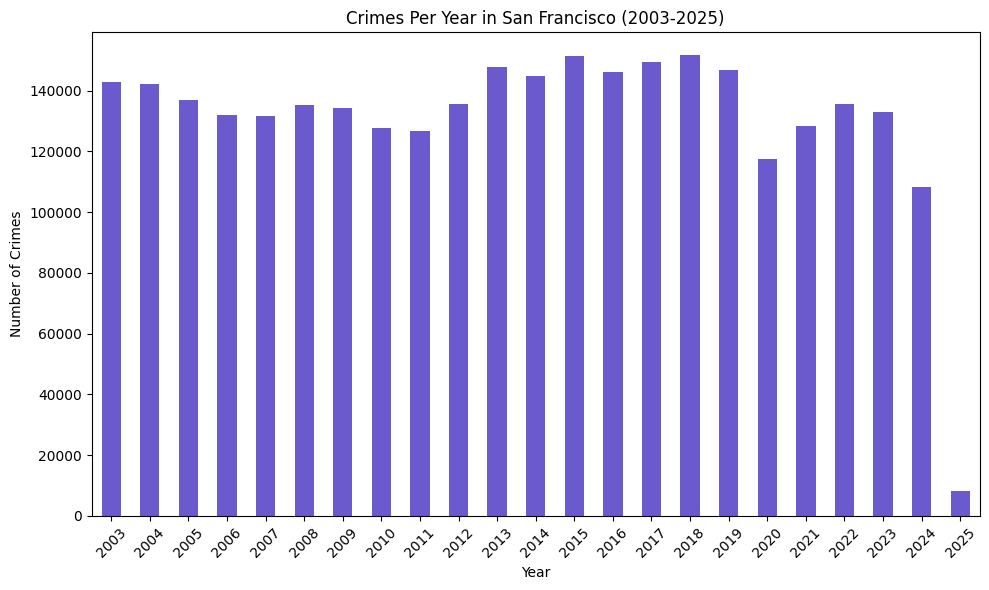

In [5]:
# --- Overall Bar Plot for Crimes Per Year ---
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='slateblue')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crimes Per Year in San Francisco (2003-2025)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

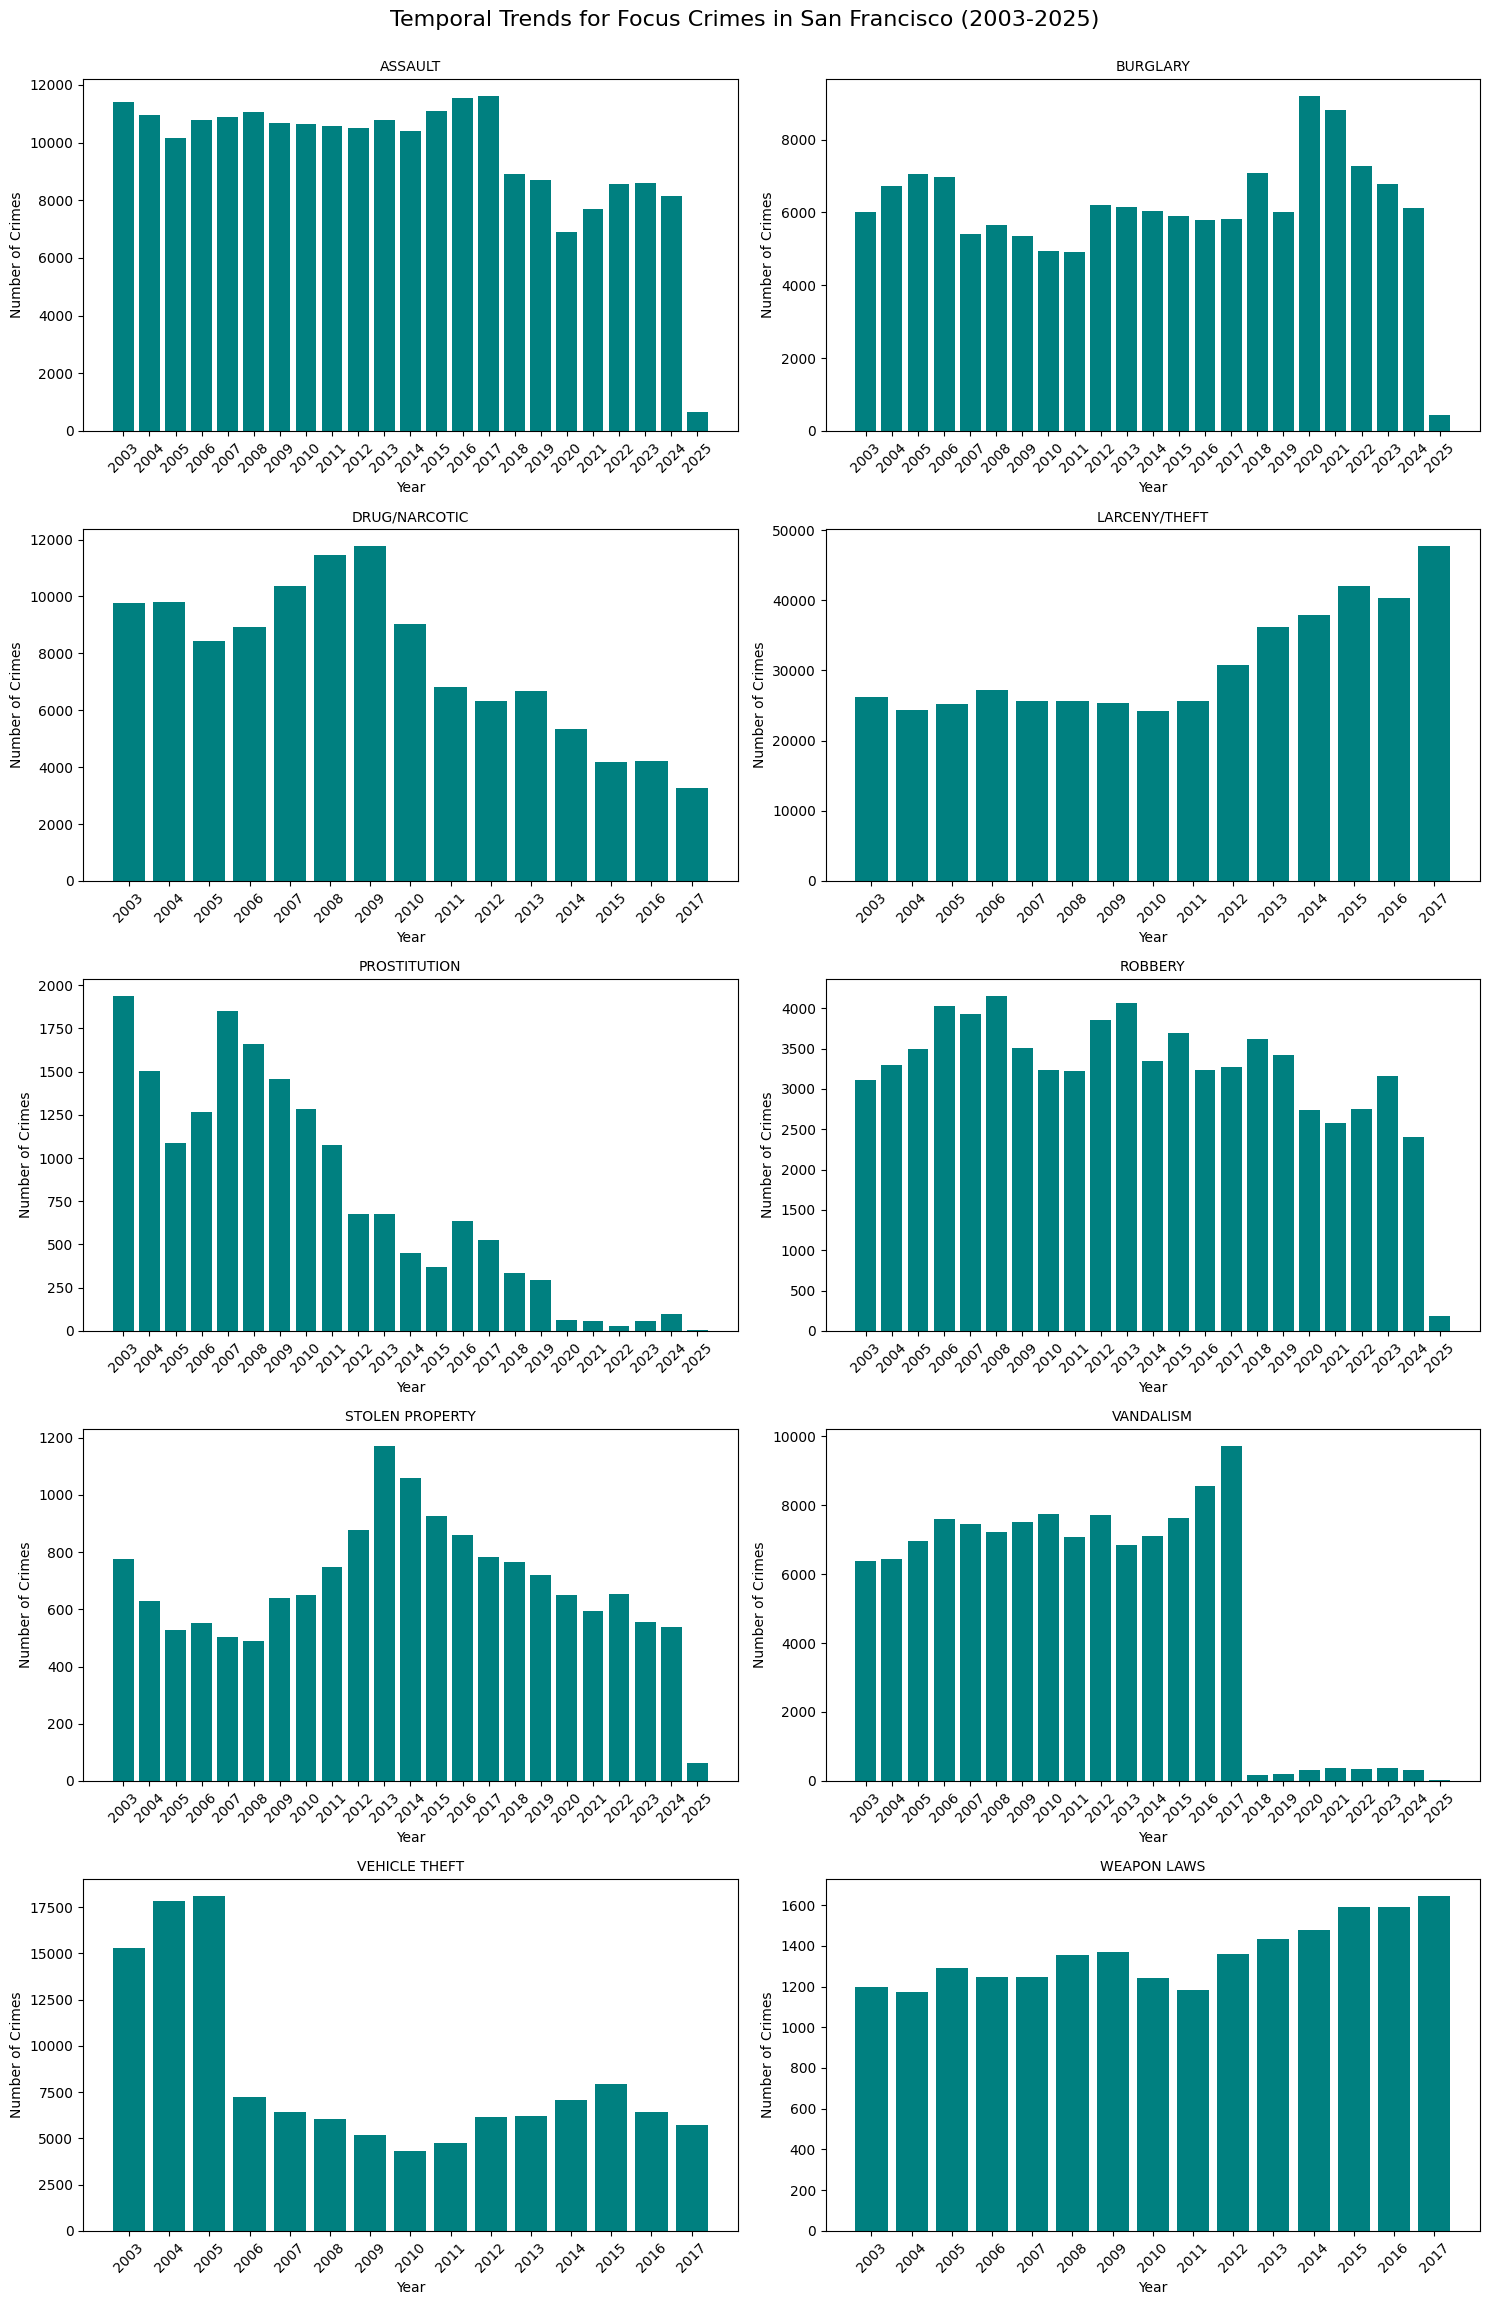

In [6]:
# --- Focus Crimes Analysis ---
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT',
    'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
])

# Create a subplot grid: 5 rows x 2 columns for the 10 focus crimes.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

sorted_focus = sorted(focuscrimes)

for i, crime in enumerate(sorted_focus):
    # Filter dataset for the current focus crime.
    crime_df = df[df['Crime_Category'] == crime]
    # Count crimes per year for this category.
    crime_year_counts = crime_df['Year'].value_counts().sort_index()
    
    # Plotting the year-by-year development for this focus crime.
    axes[i].bar(crime_year_counts.index.astype(str), crime_year_counts.values, color='teal')
    axes[i].set_title(f"{crime}", fontsize=10)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Crimes")
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Temporal Trends for Focus Crimes in San Francisco (2003-2025)", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Crime Trends Analysis

This notebook analyzes three key trends observed in crime data over 2003-2025. The trends highlight how technological advances, policy changes, and societal shifts can influence criminal behavior.

---

### 1. Significant Decline in Vehicle Theft

- **Observation:** A steep decline in vehicle theft starting from 2005.
- **Explanation:** This decline aligns with the introduction of engine immobilizer systems. These systems make vehicles more difficult to steal by requiring the proper key. As older cars without this technology are phased out, the number of easy targets for thieves diminishes.
- **Impact:** Demonstrates how advances in automotive technology can reduce crime rates.

---

### 2. Changing Landscape of Drug/Narcotic Offenses

- **Observation:** A noticeable drop in drug/narcotic offenses, particularly beginning in the early 2010s.
- **Explanation:** This trend may result from several factors:
  - Shifts in law enforcement priorities.
  - Policy changes, such as reduced sentencing for certain drug offenses.
  - Broader societal changes in patterns of drug use.
- **Impact:** Reflects how evolving legislation, policing strategies, and public attitudes can reshape crime statistics.

---

### 3. Fluctuations in Property-Related Crimes

- **Observation:** Categories like burglary, larceny/theft, and stolen property exhibit distinct patterns.
- **Details:**
  - **Burglary:** Generally shows a gradual decline, potentially due to improved home security measures and targeted policing.
  - **Larceny/Theft:** Its trend increases over time.
  - **Stolen Property:** From 2013 there has been a significant drop.
- **Impact:** Highlights that property crimes are influenced by economic conditions, policing strategies, and shifts in consumer habits (for example, the impact of online shopping versus in-store theft).

---

# Part 2

**Alternative ways to display temporal Visualizations of San Francisco Crime Data**

In this part, we explore three different ways to drill into on burglary-related crimes in 2022 and to temporal patterns in the San Francisco crime dataset:
- **Calendar Plot:** daily variations.
- **Time Series Plot:** Provides an overall trend and highlights changes over time with smoothing.

These multi-faceted visualizations help uncover underlying temporal trends that may be useful for further analyses in predictive policing.

In [7]:
import calplot # data visualization library for calendar heatmaps
import numpy as np

#### Part A: Calendar Heatmaps

Calendar Plots: A calendar heatmap shows how burglary crimes are distributed throughout the days of the year, similar to GitHub’s contributions chart.

In [19]:
df['Crime_Date'] = pd.to_datetime(df['Crime_Date'])
df['Year'] = df['Crime_Date'].dt.year
df['Hour'] = df['Crime_Date'].dt.hour

# Choose a subset of the data: focus on burglary crimes in 2022.
crime_of_interest = 'BURGLARY'
year_of_interest = 2022
df_subset = df[(df['Crime_Category'].str.upper() == crime_of_interest) & (df['Year'] == year_of_interest)]

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2022'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


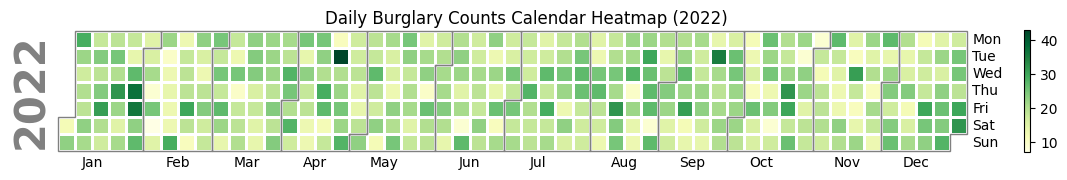

In [20]:
# =============================================================================
# 1. Calendar Plot: Daily Burglary Counts for 2022
# =============================================================================
# Aggregate burglary counts by day
daily_counts = df_subset.set_index('Crime_Date').resample('D').size()

# Option 1: Calendar heatmap for all complete years (here, 2022 only)
calplot.calplot(daily_counts, cmap='YlGn', colorbar=True,
                suptitle='Daily Burglary Counts Calendar Heatmap (2022)')

Text(0.5, 0.98, 'Burglary Calendar Heatmap for 2022')

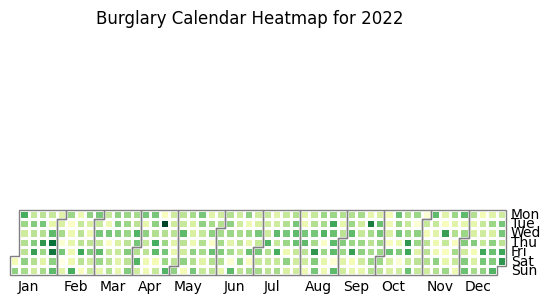

In [23]:
# Option 2: Alternatively,  a yearplot for 2022 only.
calplot.yearplot(daily_counts[daily_counts.index.year == year_of_interest], 
                 year=year_of_interest, cmap='YlGn')
plt.suptitle(f'Burglary Calendar Heatmap for {year_of_interest}')

### Part C: Time Series Plots

A classic time series plot that shows the daily counts of burglary crimes along with a rolling average for smoothing.

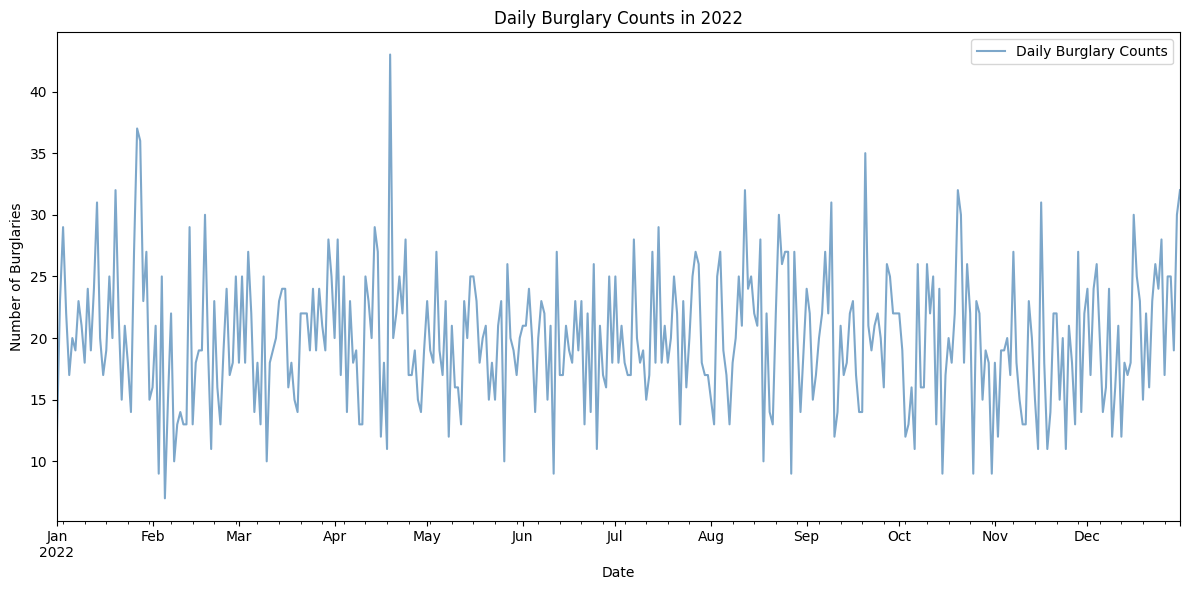

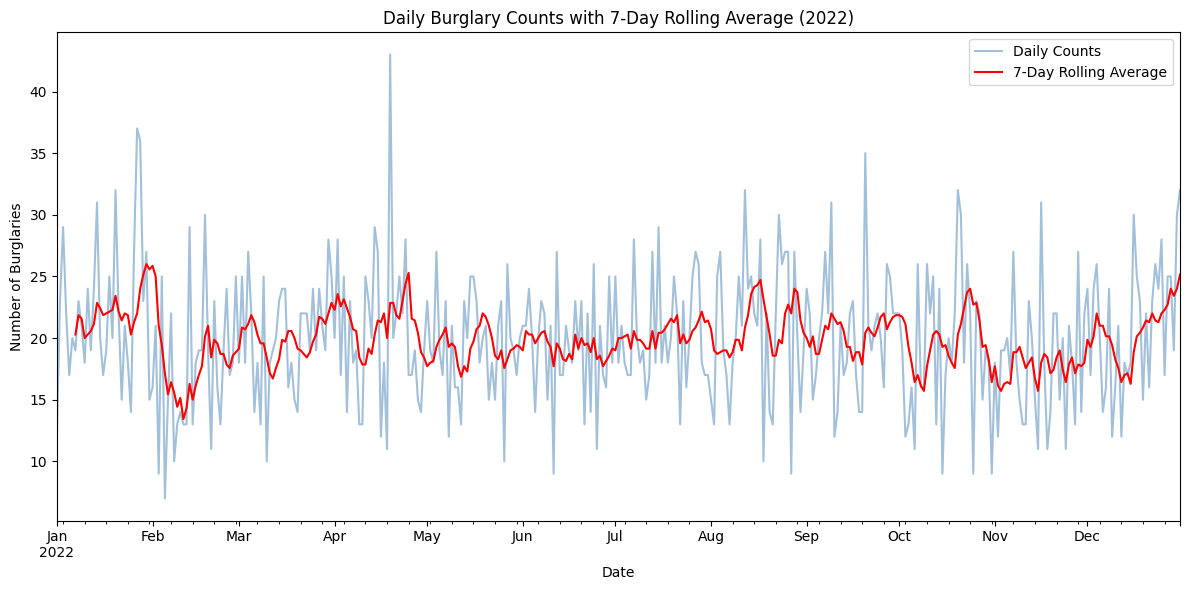

In [ ]:
# Resample the subset to get daily burglary counts.
daily_counts = df_subset.set_index('Crime_Date').resample('D').size()

# Plot the raw daily counts.
plt.figure(figsize=(12, 6))
daily_counts.plot(alpha=0.7, label='Daily Burglary Counts', color='steelblue')
plt.xlabel('Date')
plt.ylabel('Number of Burglaries')
plt.title('Daily Burglary Counts in 2022')
plt.tight_layout()
plt.legend()
plt.show()

# Compute a 7-day rolling average to smooth the time series.
rolling_avg = daily_counts.rolling(window=7).mean()

# Plot both the daily counts and the rolling average.
plt.figure(figsize=(12, 6))
daily_counts.plot(alpha=0.5, label='Daily Counts', color='steelblue')
rolling_avg.plot(label='7-Day Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Burglaries')
plt.title('Daily Burglary Counts with 7-Day Rolling Average (2022)')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis of Burglary Data in 2022

### Calendar Heatmap Observations

- **High Spike in April:**  
  A notable observation is that a Tuesday in April registered the highest daily count of burglaries (exceeding 40 incidents). This outlier stands out against most days that generally range between 10 and 30 incidents.

- **Irregular Patterns:**  
  Although there are sporadic spikes scattered throughout the year, no clear seasonal pattern emerges (e.g., summer isn’t consistently high and winter isn’t consistently low). Instead, clusters of higher activity appear to be tied to specific local events or other external factors.

## Time Series & Rolling Average Insights

- **Daily Fluctuations:**  
  The time series plot (blue line) shows significant day-to-day variations, with several peaks, including the prominent April surge.

- **Stabilized Trend with Rolling Average:**  
  The 7‑day rolling average (red line) smooths out these fluctuations, generally stabilizing between 15 and 25 incidents. This suggests a moderate yet consistent level of burglary activity throughout the year.

- **Identification of Key Periods:**  
  Apart from the April spike, smaller surges at different times hint at additional factors (like holidays or changes in policing) influencing burglary rates. The rolling average shows slight increases during periods such as late summer or early fall, possibly indicating clusters of heightened activity.

## Combined Insights

- **Granular & Broader Trends:**  
  The calendar heatmap provides a day-by-day view, making it easier to spot specific outliers like the high Tuesday in April. Meanwhile, the time series plot with a rolling average offers a broader perspective, smoothing short-term noise to reveal overall trends.

- **Implications for Further Analysis:**  
  By integrating both visualizations, you gain a richer understanding of when burglary incidents surge. This dual approach can guide investigations into potential causes (e.g., local events, changes in law enforcement strategies) and support predictive policing efforts.

---

This multi-faceted view is essential for identifying not only the outliers but also the underlying temporal trends in burglary data throughout 2022.